In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
plateaus = getters.get_plateaus()
colors = {"Wav1-1":"blue", "Wav1-2":"orange", "Wav1-3":"red", "Wav1-4":"green",
          "Wav2-1":"yellow", "Wav2-2":"black", "Wav2-3":"grey", "Wav2-4":"purple", "Wav2-5":"darkred"}
import gc

/eos/home-j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/plateaus.json


Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:27<00:00,  1.61s/it]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 44.80it/s]

1679583976.9189682 0


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:58<00:00,  2.52s/it]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 58.77it/s]

1679907092.9591475 66760.94393873215


Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [01:09<00:00,  3.85s/it]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 41.51it/s]

1680024623.181234 158262.30648612976


<function gc.collect(generation=2)>

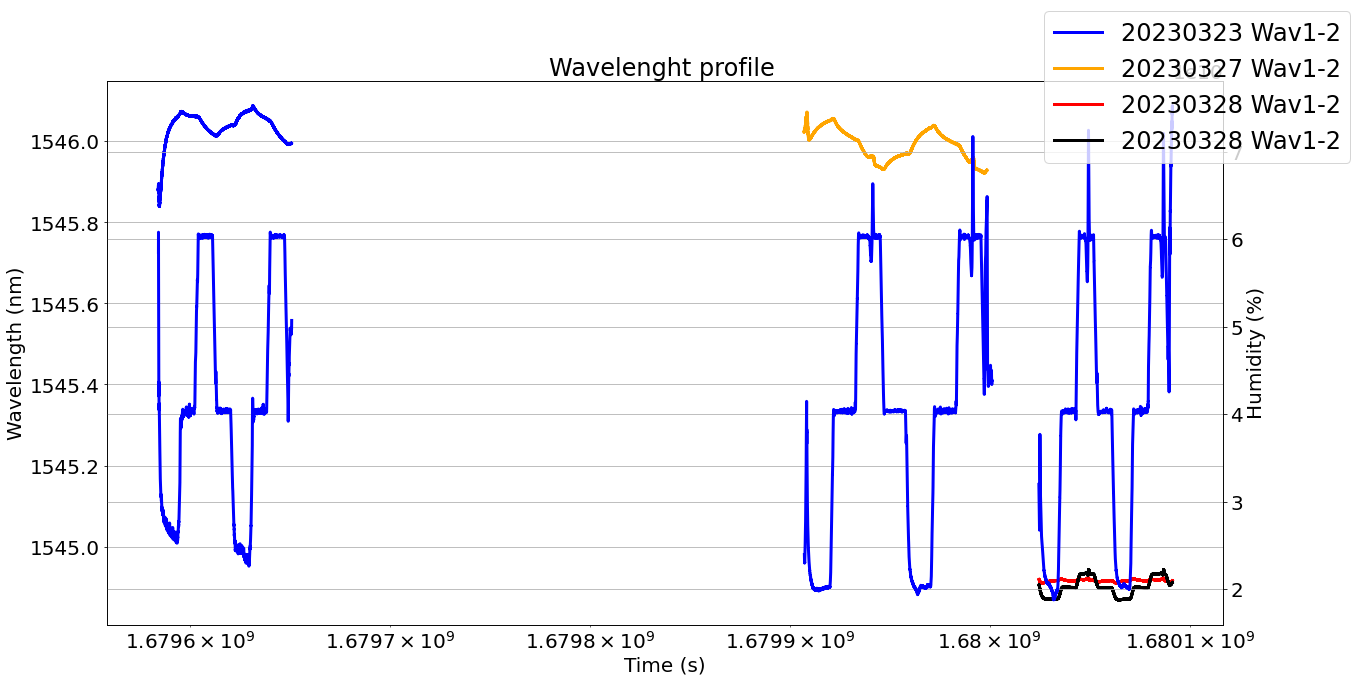

In [2]:
#Tres runs, un wav1
dates=["20230323", "20230327", "20230328"]
colors = {"20230323":"blue", "20230327":"orange", "20230328":"red"}
sens="Wav1-2"
fig,axes = plt.subplots(nrows=1, ncols=1)
twin_axes = axes.twinx()
fig.set_size_inches(20, 10)
tf = 0
p0 = 0
for date in dates:
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    hum = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    if date == "20230323":
        p0 = peaks[sens][0]
    t0 = peaks["Timestamp"][0]
    print(t0, tf)
    axes.plot(peaks["Timestamp"],
              1e9*(peaks[sens]),
              color=colors[date], label=date+" "+sens)
    if date == "20230328":
        axes.plot(peaks["Timestamp"],
              1e9*(peaks["Wav2-2"]),
              color="black", label=date+" "+sens)
    twin_axes.plot(hum["Timestamp"],
              1e9*(hum["RH"]),
              color="blue")
    tf = np.max(peaks["Timestamp"])-t0+tf
    #if date =="20230328":
    #    axes.plot(peaks["Timestamp"]-peaks["Timestamp"][0], 1e9*(peaks[sens] - peaks[sens][0]), color=colors[date], label=date+" Wav2-1")
    axes.set_title("Wavelenght profile ")
    axes.set_xlabel("Time (s)")
    axes.set_ylabel("Wavelength (nm)")
    twin_axes.set_ylabel("Humidity (%)")
axes.set_xscale("log")
fig.legend(loc="upper right")
fig.show()
del fig
del axes
gc.collect

In [3]:
gc.collect

<function gc.collect(generation=2)>